In [242]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performance like heart rate and power. The goal is to perform
some exploration and analysis of this data. 

The data represents four races. Two are time trials where the rider rides alone on a set course. Two are 
road races where the rider rides with a Peloton. All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions that have been explored through the analysis of the data involves:
* The the overall distance travelled for each of the rides? What are the average speeds etc. Providing a summary for each ride.
* Comparing the range of speeds for each ride, are time trials faster than road races? 
* Comparing the speeds achieved in the two time trials (three years apart). As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html). Experimentation with smoothing is contained within the analysis.

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

Code has been extracted from [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications. The sample files were exported from [Strava](https://strava.com/) and represent four races.


In [243]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

## Basic Data Analysis
These datasets provide a basic perspective on how comprehensive and in-depth these questions will be answered with detail and precision of data. They involve simple usage of fields that are later going to transform into a more cohesive and informed version, utilising the same description. Thereby, this introduces the basic components of modelling datasets and supporting that data with intricate information to describe perfectly how this data coalesces.

### *Exploring Distance, Average and Range Calculations*

Calculating the summation of distance travelled through each road race and time trial and receiving the total

In [244]:
rr_2016['distance'].sum()

49.04858574628638

In [245]:
tt_2016['distance'].sum()

24.80288703130808

In [246]:
rr_2019['distance'].sum()

51.7891325359606

In [247]:
tt_2019['distance'].sum() + rr_2019['distance'].sum() + tt_2016['distance'].sum() + rr_2016['distance'].sum()

150.02075035732082

In [248]:
rr_2016['cum_distance'] = rr_2016['distance'].cumsum()

In [249]:
rr_2019['cum_distance'] = rr_2019['distance'].cumsum()

Calculating the average of achieved speed through each road race and time trial. Data is conclusive with the same numerical average being **33**.

In [250]:
rr_2016['speed'].mean()

34.93308475482947

In [251]:
tt_2016['speed'].mean()

33.52996304869014

In [252]:
rr_2019['speed'].mean()

33.87986137188044

In [253]:
tt_2019['speed'].mean()

33.05782378815691

This represents the entirety of speeds computed and its analysis of different times to determine and pinpoint accurate data.

In [254]:
rr_2016['speed']

2016-05-14 04:02:41+00:00     0.000000
2016-05-14 04:02:42+00:00    11.777020
2016-05-14 04:02:46+00:00    16.375033
2016-05-14 04:02:49+00:00    21.243901
2016-05-14 04:02:51+00:00    23.401217
                               ...    
2016-05-14 05:29:16+00:00    31.045284
2016-05-14 05:29:17+00:00    29.562739
2016-05-14 05:29:18+00:00    30.073849
2016-05-14 05:29:19+00:00    29.705591
2016-05-14 05:29:21+00:00    28.699591
Name: speed, Length: 2822, dtype: float64

Expressing the numerical range of data.

In [255]:
for i in np.arange(11.777020, 31.045284):
    print(i, end = ', ')

11.77702, 12.77702, 13.77702, 14.77702, 15.77702, 16.77702, 17.77702, 18.77702, 19.77702, 20.77702, 21.77702, 22.77702, 23.77702, 24.77702, 25.77702, 26.77702, 27.77702, 28.77702, 29.77702, 30.77702, 

This calculates the cumulative summation of distance in the 2016 road race.

In [256]:
rr_2016['distance'].cumsum()

2016-05-14 04:02:41+00:00     0.000000
2016-05-14 04:02:42+00:00     0.003271
2016-05-14 04:02:46+00:00     0.021466
2016-05-14 04:02:49+00:00     0.039169
2016-05-14 04:02:51+00:00     0.052170
                               ...    
2016-05-14 05:29:16+00:00    49.007824
2016-05-14 05:29:17+00:00    49.016036
2016-05-14 05:29:18+00:00    49.024390
2016-05-14 05:29:19+00:00    49.032642
2016-05-14 05:29:21+00:00    49.048586
Name: distance, Length: 2822, dtype: float64

In [257]:
rr_2016['overall_distance'] = rr_2016['distance'].cumsum()
rr_2016

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,cum_distance,overall_distance
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN,0.000000,0.000000
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0,0.003271,0.003271
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0,0.021466,0.021466
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0,0.039169,0.039169
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0,0.052170,0.052170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 05:29:16+00:00,-33.416432,151.222722,198.4,24.0,0.0,0.0,172.0,0.008624,0.0,31.045284,1.0,49.007824,49.007824
2016-05-14 05:29:17+00:00,-33.416497,151.222764,198.4,24.0,0.0,0.0,168.0,0.008212,0.0,29.562739,1.0,49.016036,49.016036
2016-05-14 05:29:18+00:00,-33.416563,151.222807,198.4,24.0,0.0,0.0,164.0,0.008354,0.0,30.073849,1.0,49.024390,49.024390
2016-05-14 05:29:19+00:00,-33.416627,151.222852,198.4,24.0,0.0,0.0,161.0,0.008252,0.0,29.705591,1.0,49.032642,49.032642


In [258]:
i = range(rr_2016.shape[0])
rr_2016['index'] = i
rr_2016

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,cum_distance,overall_distance,index
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN,0.000000,0.000000,0
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0,0.003271,0.003271,1
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0,0.021466,0.021466,2
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0,0.039169,0.039169,3
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0,0.052170,0.052170,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 05:29:16+00:00,-33.416432,151.222722,198.4,24.0,0.0,0.0,172.0,0.008624,0.0,31.045284,1.0,49.007824,49.007824,2817
2016-05-14 05:29:17+00:00,-33.416497,151.222764,198.4,24.0,0.0,0.0,168.0,0.008212,0.0,29.562739,1.0,49.016036,49.016036,2818
2016-05-14 05:29:18+00:00,-33.416563,151.222807,198.4,24.0,0.0,0.0,164.0,0.008354,0.0,30.073849,1.0,49.024390,49.024390,2819
2016-05-14 05:29:19+00:00,-33.416627,151.222852,198.4,24.0,0.0,0.0,161.0,0.008252,0.0,29.705591,1.0,49.032642,49.032642,2820


From this figure displaying the increase of **distance**, **time** and **speed**, the changes between cadence and temperature offer better speed and overall distance. Location, guided by specific latitude and longitude, change the elevation, thereby constituting an overall better performance.  *Distance* = 0.119749 

### *Simple Elevation Analysis*
Analyising elevation gain through the use graphs to plot the latitude of the road races and time trials. These graphs often have a symmetrical replicate, representing the procedure of elevation gain.

<AxesSubplot:>

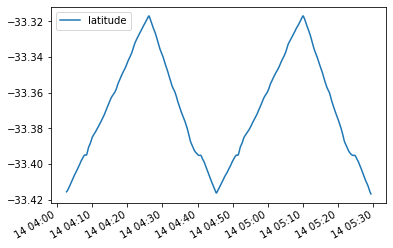

In [259]:
rr_2016.plot(y = 'latitude')

<AxesSubplot:>

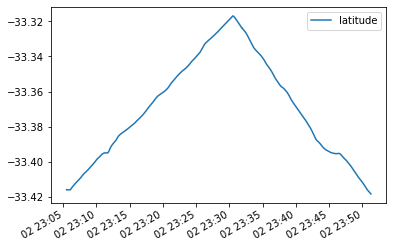

In [260]:
tt_2016.plot(y = 'latitude')

<AxesSubplot:xlabel='overall_distance'>

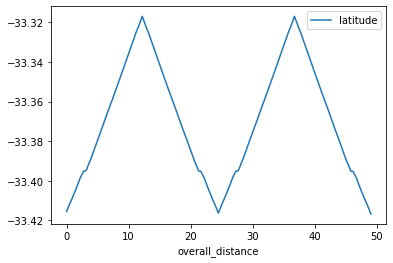

In [261]:
rr_2016.plot(x = 'overall_distance', y = 'latitude')

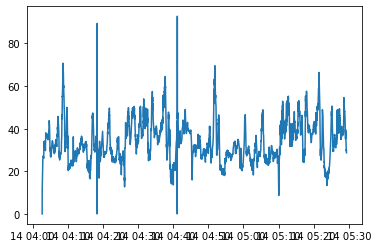

In [262]:
plt.plot(rr_2016['speed'])

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

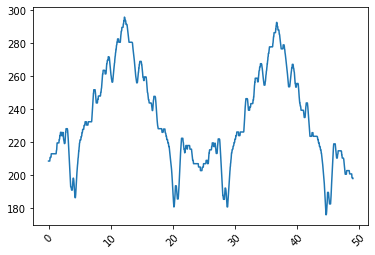

In [263]:
from matplotlib.dates import DateFormatter
plt.plot(rr_2016['cum_distance'], rr_2016['elevation'])
plt.xticks(rotation = 45)

/Users/aryan/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hr', ylabel='Density'>

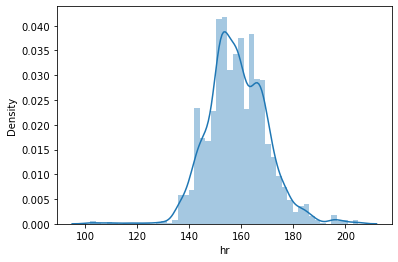

In [264]:
import seaborn as sns
sns.distplot(rr_2016["hr"])

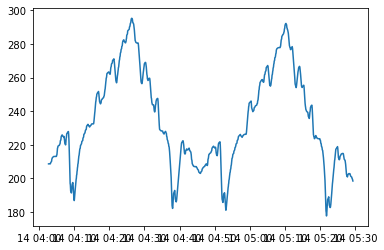

In [265]:
plt.plot(rr_2016['elevation'].rolling(10, 1).mean())

### *Constituting the Support of Data*
Basic data modelling to support decision-making and simplify the process of investigating data.

In [266]:
rr_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,cum_distance,overall_distance,index
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN,0.000000,0.000000,0
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0,0.003271,0.003271,1
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0,0.021466,0.021466,2
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0,0.039169,0.039169,3
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0,0.052170,0.052170,4


In [267]:
tt_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:05:30+00:00,-33.415971,151.222016,111.8,12.0,0.0,58.0,108.0,0.000000,0.0,0.000000,NaN
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,2.0
2016-07-02 23:05:38+00:00,-33.416034,151.222023,111.8,12.0,0.0,58.0,105.0,0.001652,0.0,0.991282,6.0
2016-07-02 23:06:01+00:00,-33.416041,151.222038,111.8,13.0,0.0,58.0,100.0,0.001595,0.0,0.249655,23.0
2016-07-02 23:06:02+00:00,-33.416048,151.222053,111.8,13.0,0.0,65.0,101.0,0.001595,0.0,5.742071,1.0


In [268]:
rr_2016.index

DatetimeIndex(['2016-05-14 04:02:41+00:00', '2016-05-14 04:02:42+00:00',
               '2016-05-14 04:02:46+00:00', '2016-05-14 04:02:49+00:00',
               '2016-05-14 04:02:51+00:00', '2016-05-14 04:02:52+00:00',
               '2016-05-14 04:02:56+00:00', '2016-05-14 04:02:58+00:00',
               '2016-05-14 04:02:59+00:00', '2016-05-14 04:03:02+00:00',
               ...
               '2016-05-14 05:29:04+00:00', '2016-05-14 05:29:05+00:00',
               '2016-05-14 05:29:10+00:00', '2016-05-14 05:29:11+00:00',
               '2016-05-14 05:29:15+00:00', '2016-05-14 05:29:16+00:00',
               '2016-05-14 05:29:17+00:00', '2016-05-14 05:29:18+00:00',
               '2016-05-14 05:29:19+00:00', '2016-05-14 05:29:21+00:00'],
              dtype='datetime64[ns, UTC]', length=2822, freq=None)

In [269]:
rr_2019.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,cum_distance
2019-06-22 22:33:45+00:00,-33.416592,151.222853,215.0,0.0,0.0,58.0,71.0,0.000000,0.0,0.000000,NaN,0.000000
2019-06-22 22:33:46+00:00,-33.416629,151.222877,215.0,0.0,147.0,58.0,71.0,0.004679,0.0,16.842677,1.0,0.004679
2019-06-22 22:33:47+00:00,-33.416677,151.222905,214.8,0.0,97.0,60.0,71.0,0.005936,-0.2,21.371074,1.0,0.010615
2019-06-22 22:33:48+00:00,-33.416730,151.222937,214.8,0.0,74.0,61.0,71.0,0.006599,0.0,23.757913,1.0,0.017214
2019-06-22 22:33:49+00:00,-33.416783,151.222972,214.8,0.0,136.0,62.0,71.0,0.006729,0.0,24.225566,1.0,0.023944


In [270]:
tt_2019.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-01 22:54:55+00:00,-33.415798,151.222060,219.4,13.0,0.0,0.0,88.0,0.000000,0.0,0.000000,NaN
2019-06-01 22:54:56+00:00,-33.415782,151.222051,219.4,13.0,0.0,0.0,88.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:57+00:00,-33.415767,151.222041,219.4,13.0,0.0,0.0,88.0,0.001909,0.0,6.871582,1.0
2019-06-01 22:54:58+00:00,-33.415751,151.222032,219.4,13.0,0.0,0.0,89.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:59+00:00,-33.415735,151.222022,219.4,13.0,0.0,0.0,89.0,0.002007,0.0,7.223997,1.0


### *Summary of Rides*
This is going to establish the critical analysis, supporting statistical information and drawing conclusions to summarise the crucial questions asked. The following will provide summaries, analysing overall distance travelled for each of the rides and the average speeds. This will uncover essential patterns through the calculation of averages to justify the trends in the data.

In [271]:
def rides(data):
    distance = sum(data['distance'])
    average = sum(data['speed']) / len(data['speed'])
    print('Overall Distance:', round(distance, 2))
    print('Average Calculation:', round(average, 2))
    print(data.describe())

In [272]:
rides(rr_2016)

Overall Distance: 49.05
Average Calculation: 34.93
          latitude    longitude    elevation  temperature   power  \
count  2822.000000  2822.000000  2822.000000  2822.000000  2822.0   
mean    -33.368017   151.225527   232.404465    25.280652     0.0   
std       0.028329     0.006014    29.725934     1.348746     0.0   
min     -33.416753   151.211496   176.000000    24.000000     0.0   
25%     -33.393691   151.221912   209.450000    24.000000     0.0   
50%     -33.371820   151.227236   226.100000    25.000000     0.0   
75%     -33.342269   151.230069   258.200000    26.000000     0.0   
max     -33.316890   151.235131   295.800000    30.000000     0.0   

           cadence           hr     distance  elevation_gain        speed  \
count  2822.000000  2822.000000  2822.000000     2822.000000  2822.000000   
mean     65.987952   158.394401     0.017381       -0.003756    34.933085   
std      34.425881    11.304588     0.015695        0.458872    10.738677   
min       0.000000 

In [273]:
rides(tt_2016)

Overall Distance: 24.8
Average Calculation: 33.53
          latitude    longitude    elevation  temperature   power  \
count  1541.000000  1541.000000  1541.000000  1541.000000  1541.0   
mean    -33.368105   151.225411   139.068657    10.953277     0.0   
std       0.028055     0.006166    30.301132     0.657937     0.0   
min     -33.418368   151.211206    85.000000    10.000000     0.0   
25%     -33.393795   151.221870   116.200000    11.000000     0.0   
50%     -33.370613   151.227333   134.000000    11.000000     0.0   
75%     -33.343332   151.230072   165.400000    11.000000     0.0   
max     -33.316888   151.235137   202.600000    13.000000     0.0   

           cadence           hr     distance  elevation_gain        speed  \
count  1541.000000  1541.000000  1541.000000     1541.000000  1541.000000   
mean     83.277093   170.939650     0.016095       -0.002466    33.529963   
std      21.169978    23.392548     0.015897        0.515343    11.519681   
min       0.000000  

In [274]:
rides(rr_2019)

Overall Distance: 51.79
Average Calculation: 33.88
          latitude    longitude    elevation  temperature        power  \
count  5503.000000  5503.000000  5503.000000  5503.000000  5503.000000   
mean    -33.371644   151.225232   243.243576     5.997819   213.617845   
std       0.030592     0.006142    30.197981     0.806414   144.123686   
min     -33.422174   151.211507   185.200000     0.000000     0.000000   
25%     -33.396939   151.221591   219.600000     5.000000   104.000000   
50%     -33.373835   151.227064   236.000000     6.000000   212.000000   
75%     -33.344994   151.229977   269.600000     7.000000   308.000000   
max     -33.316865   151.235094   310.400000     7.000000   785.000000   

           cadence           hr     distance  elevation_gain        speed  \
count  5503.000000  5503.000000  5503.000000     5503.000000  5503.000000   
mean     70.004906   138.998546     0.009411        0.000254    33.879861   
std      29.869938    16.184123     0.002459       

In [275]:
rides(rr_2019)

Overall Distance: 51.79
Average Calculation: 33.88
          latitude    longitude    elevation  temperature        power  \
count  5503.000000  5503.000000  5503.000000  5503.000000  5503.000000   
mean    -33.371644   151.225232   243.243576     5.997819   213.617845   
std       0.030592     0.006142    30.197981     0.806414   144.123686   
min     -33.422174   151.211507   185.200000     0.000000     0.000000   
25%     -33.396939   151.221591   219.600000     5.000000   104.000000   
50%     -33.373835   151.227064   236.000000     6.000000   212.000000   
75%     -33.344994   151.229977   269.600000     7.000000   308.000000   
max     -33.316865   151.235094   310.400000     7.000000   785.000000   

           cadence           hr     distance  elevation_gain        speed  \
count  5503.000000  5503.000000  5503.000000     5503.000000  5503.000000   
mean     70.004906   138.998546     0.009411        0.000254    33.879861   
std      29.869938    16.184123     0.002459       

### *Significant Speed Averages*
This will determine the mean speed in both road races and time trials, divulging imperative differences in data and calculating simple summation and division of the data presented.

In [276]:
def speed(data):
    print('Average Speed:', data['speed'].mean())
    return data['speed'].mean()

In [277]:
(speed(rr_2016) + speed(rr_2019)) / 2

Average Speed: 34.93308475482947
Average Speed: 33.87986137188044


34.40647306335495

In [278]:
(speed(tt_2016) + speed(tt_2019)) / 2

Average Speed: 33.52996304869014
Average Speed: 33.05782378815691


33.29389341842352

In [279]:
rr_2016

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,cum_distance,overall_distance,index
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN,0.000000,0.000000,0
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0,0.003271,0.003271,1
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0,0.021466,0.021466,2
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0,0.039169,0.039169,3
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0,0.052170,0.052170,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 05:29:16+00:00,-33.416432,151.222722,198.4,24.0,0.0,0.0,172.0,0.008624,0.0,31.045284,1.0,49.007824,49.007824,2817
2016-05-14 05:29:17+00:00,-33.416497,151.222764,198.4,24.0,0.0,0.0,168.0,0.008212,0.0,29.562739,1.0,49.016036,49.016036,2818
2016-05-14 05:29:18+00:00,-33.416563,151.222807,198.4,24.0,0.0,0.0,164.0,0.008354,0.0,30.073849,1.0,49.024390,49.024390,2819
2016-05-14 05:29:19+00:00,-33.416627,151.222852,198.4,24.0,0.0,0.0,161.0,0.008252,0.0,29.705591,1.0,49.032642,49.032642,2820


In [280]:
rr_2019

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,cum_distance
2019-06-22 22:33:45+00:00,-33.416592,151.222853,215.0,0.0,0.0,58.0,71.0,0.000000,0.0,0.000000,NaN,0.000000
2019-06-22 22:33:46+00:00,-33.416629,151.222877,215.0,0.0,147.0,58.0,71.0,0.004679,0.0,16.842677,1.0,0.004679
2019-06-22 22:33:47+00:00,-33.416677,151.222905,214.8,0.0,97.0,60.0,71.0,0.005936,-0.2,21.371074,1.0,0.010615
2019-06-22 22:33:48+00:00,-33.416730,151.222937,214.8,0.0,74.0,61.0,71.0,0.006599,0.0,23.757913,1.0,0.017214
2019-06-22 22:33:49+00:00,-33.416783,151.222972,214.8,0.0,136.0,62.0,71.0,0.006729,0.0,24.225566,1.0,0.023944
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-23 00:05:23+00:00,-33.415728,151.222289,216.6,7.0,28.0,23.0,153.0,0.010218,-0.2,36.786246,1.0,51.750079
2019-06-23 00:05:24+00:00,-33.415808,151.222340,216.6,7.0,13.0,10.0,153.0,0.010077,0.0,36.275739,1.0,51.760155
2019-06-23 00:05:25+00:00,-33.415885,151.222391,216.6,7.0,0.0,0.0,152.0,0.009783,0.0,35.220093,1.0,51.769939
2019-06-23 00:05:26+00:00,-33.415962,151.222440,216.6,7.0,0.0,0.0,152.0,0.009695,0.0,34.901660,1.0,51.779633


In [281]:
tt_2016

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:05:30+00:00,-33.415971,151.222016,111.8,12.0,0.0,58.0,108.0,0.000000,0.0,0.000000,NaN
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,2.0
2016-07-02 23:05:38+00:00,-33.416034,151.222023,111.8,12.0,0.0,58.0,105.0,0.001652,0.0,0.991282,6.0
2016-07-02 23:06:01+00:00,-33.416041,151.222038,111.8,13.0,0.0,58.0,100.0,0.001595,0.0,0.249655,23.0
2016-07-02 23:06:02+00:00,-33.416048,151.222053,111.8,13.0,0.0,65.0,101.0,0.001595,0.0,5.742071,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-02 23:50:39+00:00,-33.415476,151.221628,116.0,11.0,0.0,100.0,163.0,0.024989,0.0,44.980624,2.0
2016-07-02 23:50:41+00:00,-33.415667,151.221757,115.4,11.0,0.0,99.0,163.0,0.024381,-0.6,43.885165,2.0
2016-07-02 23:50:45+00:00,-33.416048,151.222013,115.4,11.0,0.0,0.0,162.0,0.048573,0.0,43.716017,4.0
2016-07-02 23:51:16+00:00,-33.418333,151.223478,108.0,11.0,0.0,64.0,143.0,0.288175,-7.4,33.465472,31.0


In [282]:
tt_2019

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-01 22:54:55+00:00,-33.415798,151.222060,219.4,13.0,0.0,0.0,88.0,0.000000,0.0,0.000000,NaN
2019-06-01 22:54:56+00:00,-33.415782,151.222051,219.4,13.0,0.0,0.0,88.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:57+00:00,-33.415767,151.222041,219.4,13.0,0.0,0.0,88.0,0.001909,0.0,6.871582,1.0
2019-06-01 22:54:58+00:00,-33.415751,151.222032,219.4,13.0,0.0,0.0,89.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:59+00:00,-33.415735,151.222022,219.4,13.0,0.0,0.0,89.0,0.002007,0.0,7.223997,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01 23:39:05+00:00,-33.415270,151.221994,220.8,10.0,335.0,101.0,166.0,0.012323,-0.2,44.363507,1.0
2019-06-01 23:39:06+00:00,-33.415367,151.222056,220.8,10.0,350.0,101.0,166.0,0.012225,0.0,44.009916,1.0
2019-06-01 23:39:07+00:00,-33.415462,151.222122,220.6,10.0,273.0,101.0,166.0,0.012211,-0.2,43.960218,1.0
2019-06-01 23:39:08+00:00,-33.415555,151.222189,220.4,10.0,210.0,99.0,166.0,0.012067,-0.2,43.440736,1.0


### *Comparison of Speed*
These datasets have to answer the important question, whether road races are faster than time trials. From the averages calculated, road races have higher average with a *2.22515928986* increase.


In [283]:
def speeds(data):
    print('Minimum:', min(data['speed']))
    print('Maximum:', max(data['speed']))
    print('Average:', data['speed'].mean())
    return data['speed'].mean() + data['speed'].max()

In [284]:
speeds(rr_2016)

Minimum: 0.0
Maximum: 92.74903649913952
Average: 34.93308475482947


127.682121253969

In [285]:
speeds(rr_2019)

Minimum: 0.0
Maximum: 70.37046868335639
Average: 33.87986137188044


104.25033005523683

In [286]:
speeds(tt_2016) 

Minimum: 0.0
Maximum: 162.50576377606754
Average: 33.52996304869014


196.0357268247577

In [287]:
speeds(tt_2019)

Minimum: 0.0
Maximum: 63.300734121945005
Average: 33.05782378815691


96.35855791010192

In [288]:
speeds(rr_2016) + speeds(rr_2019)

Minimum: 0.0
Maximum: 92.74903649913952
Average: 34.93308475482947
Minimum: 0.0
Maximum: 70.37046868335639
Average: 33.87986137188044


231.93245130920582

In [289]:
speeds(tt_2016) + speeds(tt_2019)

Minimum: 0.0
Maximum: 162.50576377606754
Average: 33.52996304869014
Minimum: 0.0
Maximum: 63.300734121945005
Average: 33.05782378815691


292.39428473485964

In [290]:
tt_2016['dist'] = tt_2016['distance'].cumsum()
tt_2019['dist'] = tt_2019['distance'].cumsum()

<AxesSubplot:xlabel='dist'>

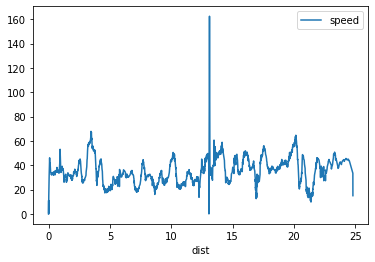

In [291]:
tt_2016.plot.line(x = 'dist', y = 'speed')

In [292]:
d = tt_2016[tt_2016['speed'] == max(tt_2016['speed'])]
print('Distance:', d['dist'][0],'Kilometres')

Distance: 13.115879917309915 Kilometres


<AxesSubplot:xlabel='dist'>

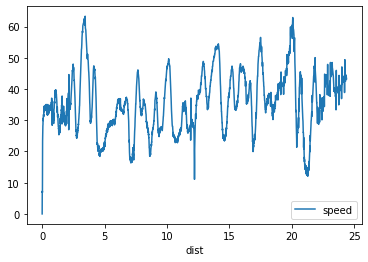

In [293]:
tt_2019.plot.line(x = 'dist', y = 'speed')

In [294]:
d = tt_2019[tt_2019['speed'] == max(tt_2019['speed'])]
print('Distance:', d['dist'][0],'Kilometres')

Distance: 3.444751664299418 Kilometres


### *Determing Elevation Gain*
This area will be investigating the elevation field in the road races and time trials. It will be focusing on three main cases that correlate with elevation gain. This involves inspecting data, being, climbing, descending and flat terrain. This data will discover the average speeds, where the three cases are the main focal point of the data investigation.

In [295]:
def elevation(data):
    data.plot.line(x = 'elevation_gain', y = 'speed')
    print('Cases:')
    data['elevation_gain_bins'] = pd.cut(x = data['elevation_gain'], bins = [-2, -.02, 0.02, 1], labels = ['Descending:', 'Flat:', 'Climbing:'])
    print(data['elevation_gain_bins'].value_counts())
    print('\nAverage:')
    print(data.groupby(['elevation_gain_bins'])['speed'].mean())

Cases:
Climbing:      1141
Descending:     925
Flat:           755
Name: elevation_gain_bins, dtype: int64

Average:
elevation_gain_bins
Descending:    45.933841
Flat:          34.379637
Climbing:      26.392798
Name: speed, dtype: float64


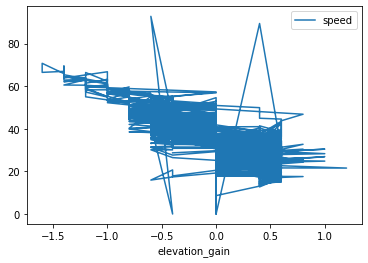

In [296]:
elevation(rr_2016)

Cases:
Climbing:      2361
Descending:    1719
Flat:          1419
Name: elevation_gain_bins, dtype: int64

Average:
elevation_gain_bins
Descending:    41.109393
Flat:          33.458463
Climbing:      28.815089
Name: speed, dtype: float64


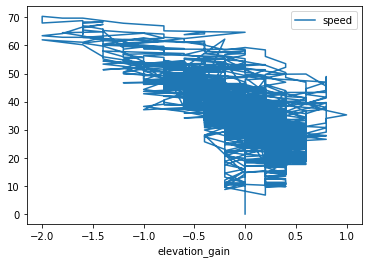

In [297]:
elevation(rr_2019)

Cases:
Climbing:      623
Descending:    463
Flat:          452
Name: elevation_gain_bins, dtype: int64

Average:
elevation_gain_bins
Descending:    44.905134
Flat:          34.249664
Climbing:      24.567067
Name: speed, dtype: float64


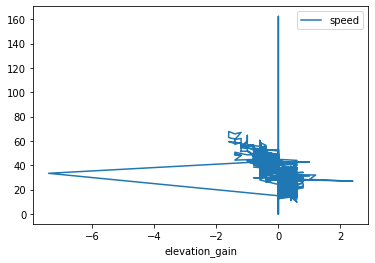

In [298]:
elevation(tt_2016)

Cases:
Climbing:      1114
Descending:     797
Flat:           744
Name: elevation_gain_bins, dtype: int64

Average:
elevation_gain_bins
Descending:    42.664764
Flat:          33.295912
Climbing:      26.025625
Name: speed, dtype: float64


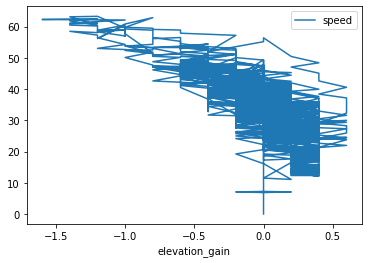

In [299]:
elevation(tt_2019)

## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__. Using these two variables we should be able to derive a measure of __development__ which would effectively tell us which gear the rider was using at the time. Development will normally range between __2m__ and __10m__. Due to errors in GPS and cadence measurements you will see many points outside this range and they should just be discarded as outliers.

The calculation of __development__ is studied for each row in a ride. The plotting of the result is encased within a _histogram_ and compared to the plots for the four rides.




### *Calculation of Development*
Utilising a histogram plot as a key aspect to discover the skew distribution of data has led to uncover the trends of data within the figures. Two essential variables of which are being measured is the cadence and speed. Calculating the variable will result in an informed development that denotes the specific rider gear. 

In [300]:
def dataset(data):
    data['development'] = data['cadence'] * data['speed']
    data['development'].plot.hist()

In the following **rr_2016** and **tt_2016** ride, the histogram displays a right-skewed distribution. The positive skewness differentiates the frequency of the mode, median, mean and any outliers present.

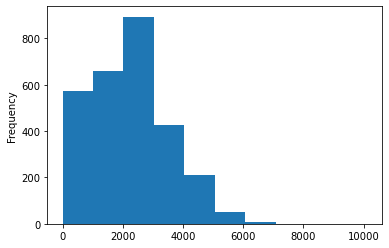

In [301]:
dataset(rr_2016)

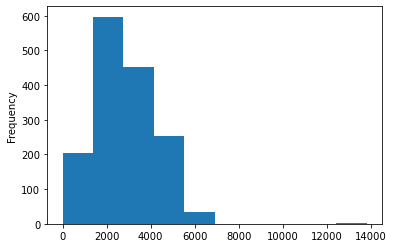

In [302]:
dataset(tt_2016)

In the following **rr_2019** ride, the histogram displays a left-skewed distribution. The negative skewness differentiates the frequency of the mode, median, mean and any outliers present. 

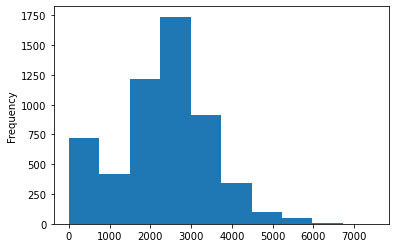

In [303]:
dataset(rr_2019)

In the following **tt_2019** ride, the histogram displays an almost symmetrical, although classifed as *normal* distribution. The normal skewness differentiates the frequency of the mode, median, mean and any outliers present. 

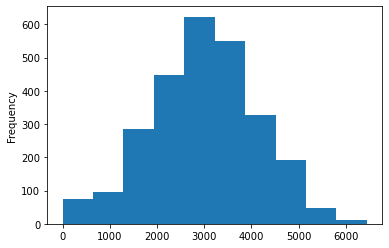

In [304]:
dataset(tt_2019)